In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Health_monitoring.csv to Health_monitoring.csv


In [ ]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['Health_monitoring.csv']))
dataset

,SBP,DBP,Pulse,Temperature,Level
0,120,80,80,98,0
1,140,83,75,100,1
2,155,100,92,104,2
3,115,82,79,97,0
4,119,79,85,102,1
...,...,...,...,...,...
144,154,99,83,103,2
145,118,77,73,98,0
146,125,87,79,102,1
147,132,88,78,101,1


In [ ]:
x=dataset.iloc[:,0:4].values
y=dataset.iloc[:,4].values
x1 = np.mean(x, axis = 0)
x = x - x1
x2 = np.std(x, axis = 0)
x = x / x2

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from joblib import dump, load

In [ ]:
# hot encoding Y
yhot = np_utils.to_categorical(y)
yhot_train = np_utils.to_categorical(y_train)
yhot_test = np_utils.to_categorical(y_test)
yhot

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1

In [ ]:
# define baseline model
def baseline_model():
  # create model
  model = Sequential()
  # Rectified Linear Unit Activation Function
  model.add(Dense(12, input_dim=4, activation='relu'))
  model.add(Dense(12, activation='relu'))
  # Softmax for multi-class classification
  model.add(Dense(3, activation='softmax'))
  # Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model



In [ ]:
cmodel = KerasClassifier(build_fn=baseline_model, epochs=500, verbose=0)

<ipython-input-13-fff897283c14>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  cmodel = KerasClassifier(build_fn=baseline_model, epochs=500, verbose=0)


In [ ]:
kfold = KFold(n_splits=10, shuffle=True)

In [ ]:
result = cross_val_score(cmodel, x, yhot, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (result.mean()*100, result.std()*100))

Baseline: 98.00% (3.06%)


In [ ]:
model = baseline_model()
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, yhot_train, validation_split=0.2,
                    epochs=1000, verbose=0)
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 12)                60        
                                                                 
 dense_34 (Dense)            (None, 12)                156       
                                                                 
 dense_35 (Dense)            (None, 3)                 39        
                                                                 
Total params: 255
Trainable params: 255
Non-trainable params: 0
_________________________________________________________________
None


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


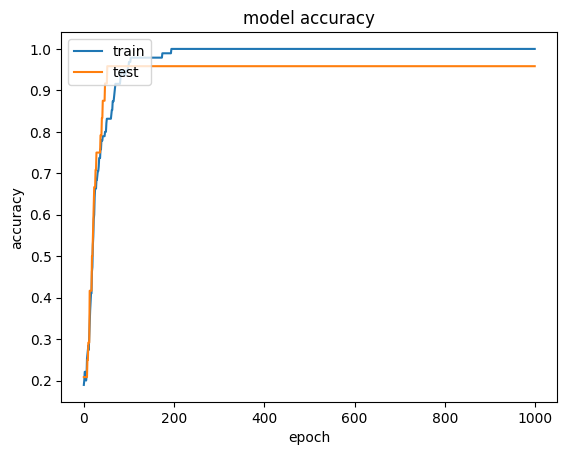

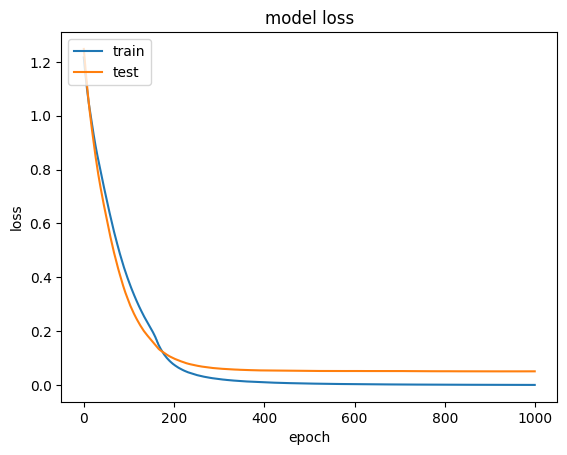

In [ ]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
_, accuracy = model.evaluate(X_test, yhot_test)
print('Accuracy from evaluate: %.2f' % (accuracy*100))

1/1 [==============================] - 0s 21ms/step - loss: 0.3923 - accuracy: 0.9667
Accuracy from evaluate: 96.67


In [ ]:
predict_x = model.predict(X_test)
pred = np.argmax(predict_x, axis=1)
print(f'Prediction Accuracy: {(pred == y_test).mean() * 100:f}')
print(y_test, pred)

1/1 [==============================] - 0s 17ms/step
Prediction Accuracy: 96.666667
[2 2 1 2 2 1 1 1 0 0 0 0 0 2 1 0 2 1 1 2 2 0 2 1 0 2 0 0 0 2] [2 2 1 2 2 1 1 2 0 0 0 0 0 2 1 0 2 1 1 2 2 0 2 1 0 2 0 0 0 2]
